(3456, 4608)


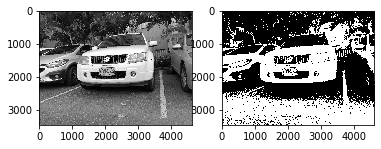

Rectangle(xy=(1803, 1728), width=473, height=235, angle=0)


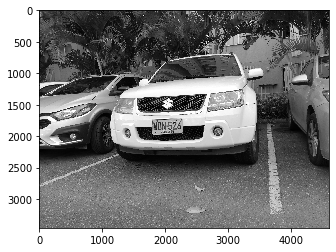

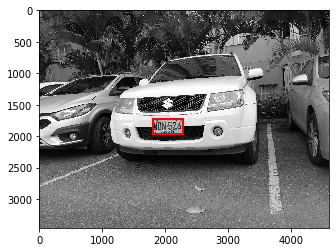

In [41]:
import cv2
import imutils
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

filename = './1.jpg'

# descomentar para leer video
#cap = cv2.VideoCapture(filename)
# cap = cv2.VideoCapture(0)
# count = 0
# while cap.isOpened() and count < 180:
#     ret,frame = cap.read()
#     if ret == True:
#         cv2.imshow('window-name',frame)
#         cv2.imwrite("./output/frame%d.jpg" % count, frame)
#         count = count + 1
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
#     else:
#         break
# cap.release()
# cv2.destroyAllWindows()

# car image -> grayscale image -> binary image

# descomentar para leer video
#car_image = imread("./output/frame%d.jpg"%(count-1), as_gray=True)
car_image = imread(filename, as_gray=True)
#car_image = imutils.rotate(car_image, 270)
# car_image = imread("car.png", as_gray=True)
# it should be a 2 dimensional array
print(car_image.shape)

# the next line is not compulsory however, a grey scale pixel
# in skimage ranges between 0 & 1. multiplying it with 255
# will make it range between 0 & 255 (something we can relate better with

gray_car_image = car_image * 255
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gray_car_image, cmap="gray")
threshold_value = threshold_otsu(gray_car_image)
binary_car_image = gray_car_image > threshold_value
# print(binary_car_image)
ax2.imshow(binary_car_image, cmap="gray")
# ax2.imshow(gray_car_image, cmap="gray")
plt.show()

# CCA (finding connected regions) of binary image


from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# this gets all the connected regions and groups them together
label_image = measure.label(binary_car_image)

# print(label_image.shape[0]) #width of car img

# getting the maximum width, height and minimum width and height that a license plate can be
plate_dimensions = (0.03*label_image.shape[0], 0.08*label_image.shape[0], 0.15*label_image.shape[1], 0.3*label_image.shape[1])
plate_dimensions2 = (0.08*label_image.shape[0], 0.2*label_image.shape[0], 0.15*label_image.shape[1], 0.4*label_image.shape[1])
plate_dimensions = (0.01*label_image.shape[0], 0.02*label_image.shape[0], 0.14*label_image.shape[1], 0.25*label_image.shape[1])
plate_dimensions2 = (0.005*label_image.shape[0], 0.07*label_image.shape[0], 0.10*label_image.shape[1], 0.21*label_image.shape[1])

min_height, max_height, min_width, max_width = plate_dimensions
plate_objects_cordinates = []
plate_like_objects = []

fig, (ax1) = plt.subplots(1)
ax1.imshow(gray_car_image, cmap="gray")
flag = 0
# regionprops creates a list of properties of all the labelled regions
for region in regionprops(label_image):
    if region.area < 180:
        #if the region is so small then it's likely not a license plate
        continue
        # the bounding box coordinates
    min_row, min_col, max_row, max_col = region.bbox
    # print(min_row)
    # print(min_col)
    # print(max_row)
    # print(max_col)

    region_height = max_row - min_row
    region_width = max_col - min_col
    # print(region_height)
    #print(region_width)

    # ensuring that the region identified satisfies the condition of a typical license plate
    if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height :
        flag = 1
        plate_like_objects.append(gray_car_image[min_row:max_row,
                                  min_col:max_col])
        plate_objects_cordinates.append((min_row, min_col,
                                         max_row, max_col))
        rectBorder = patches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, edgecolor="red",
                                       linewidth=2, fill=False)
        ax1.add_patch(rectBorder)
        print(rectBorder)
        # let's draw a red rectangle over those regions
if(flag == 1):
    # print(plate_like_objects[0])
    plt.show()


if(flag==0):
    min_height, max_height, min_width, max_width = plate_dimensions2
    plate_objects_cordinates = []
    plate_like_objects = []

    fig, (ax1) = plt.subplots(1)
    ax1.imshow(gray_car_image, cmap="gray")

    # regionprops creates a list of properties of all the labelled regions
    for region in regionprops(label_image):
        if region.area < 180:
            #if the region is so small then it's likely not a license plate
            continue
            # the bounding box coordinates
        min_row, min_col, max_row, max_col = region.bbox
        # print(min_row)
        # print(min_col)
        # print(max_row)
        # print(max_col)

        region_height = max_row - min_row
        region_width = max_col - min_col
        # print(region_height)
        #print(region_width)

        # ensuring that the region identified satisfies the condition of a typical license plate
        if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height:
            plate_like_objects.append(gray_car_image[min_row:max_row,
                                      min_col:max_col])
            plate_objects_cordinates.append((min_row, min_col,
                                             max_row, max_col))
            rectBorder = patches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, edgecolor="red",
                                           linewidth=2, fill=False)
            ax1.add_patch(rectBorder)
            print(rectBorder)
            # let's draw a red rectangle over those regions
    #print(plate_like_objects[0])
    plt.show()

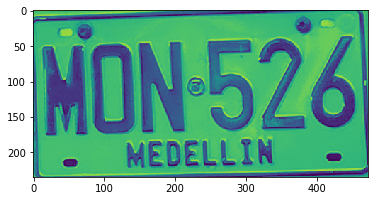

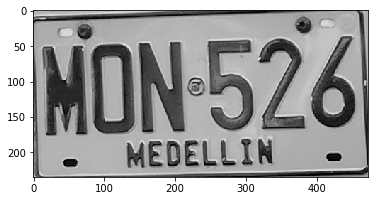

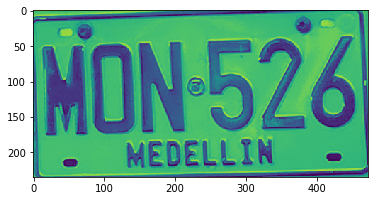

In [42]:
import numpy as np
from skimage.transform import resize
from skimage import measure
from skimage.measure import regionprops
import matplotlib.patches as patches
import matplotlib.pyplot as plt


# The invert was done so as to convert the black pixel to white pixel and vice versa
license_plate = plate_like_objects[0]
plt.imshow(license_plate)
#license_plate = np.invert(plate_like_objects[0])

labelled_plate = measure.label(license_plate)

fig, ax1 = plt.subplots(1)
ax1.imshow(license_plate, cmap="gray")
# the next two lines is based on the assumptions that the width of
# a license plate should be between 5% and 15% of the license plate,
# and height should be between 35% and 60%
# this will eliminate some
character_dimensions = (0.35*license_plate.shape[0], 0.60*license_plate.shape[0], 0.05*license_plate.shape[1], 0.15*license_plate.shape[1])
min_height, max_height, min_width, max_width = character_dimensions

characters = []
counter=0
column_list = []
for regions in regionprops(labelled_plate):
    y0, x0, y1, x1 = regions.bbox
    region_height = y1 - y0
    region_width = x1 - x0

    if region_height > min_height and region_height < max_height and region_width > min_width and region_width < max_width:
        roi = license_plate[y0:y1, x0:x1]

        # draw a red bordered rectangle over the character.
        rect_border = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, edgecolor="red",
                                       linewidth=2, fill=False)
        ax1.add_patch(rect_border)

        # resize the characters to 20X20 and then append each character into the characters list
        resized_char = resize(roi, (20, 20))
        characters.append(resized_char)

        # this is just to keep track of the arrangement of the characters
        column_list.append(x0)
# print(characters)
plt.show()
plt.imshow(license_plate)

"

ON-526

MEDELLIN


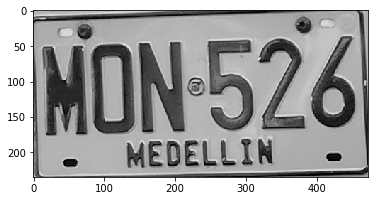

In [43]:
from PIL import Image
import pytesseract
from PIL import Image
#img = Image.open ('6.png')
#gray = cv2.cvtColor(license_plate, cmap="gray") 
text = pytesseract.image_to_string(license_plate, config='-l eng --oem 3 --psm 12')
plt.imshow(license_plate, cmap="gray")
print (text)